In [5]:
import pandas as pd        #read,explore & clean data
import numpy as np         # data manipulation
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # data visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Step 2 Loading the dataset

In [6]:
df = pd.read_csv('malaria_clin_dataset.csv')

# Step 3 Exploring the Data

3.1) Understanding all the variables of dataset

In [7]:
# Displaying First Five records of the dataset
df.head()

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [8]:
# Displaying Last Five records of the Dataset
df.tail()

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
2202,KC366,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,...,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,KC368,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,...,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,KC369,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,...,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,KC370,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,...,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2
2206,KC375,yes,Kintampo,2017,yes,No,36.4,Protozoan,Instetinal flagellates,Negative,...,272.0,12.9,7.3,59.1,35.4,5.5,2.9,1.6,0.2,15.7


In [9]:
# Displaying random five records from the dataset
df.sample(5)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
1777,K190,yes,Kintampo,2017,yes,Yes,37.5,Protozoan,Malaria/anaemia,Positive,...,210.0,4.0,9.0,48.0,36.0,16.0,4.0,2.8,1.2,19.6
517,CCS7371,yes,Navrongo,2002,NaN,Yes,37.9,Not Known / Missing entry,NaN,Positive,...,NaN,NaN,NaN,48.8,49.5,1.7,5.8,5.8,0.2,20.4
424,CCS6529,yes,Navrongo,2003,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,131.0,17.6,7.3,41.8,52.0,6.2,5.3,6.6,0.8,23.3
706,EIMK241,yes,Kintampo,2012,yes,Yes,37.0,Not Known / Missing entry,Malaria,Positive,...,128.0,13.2,6.2,58.8,35.9,5.3,2.4,1.4,0.2,14.2
1656,K043,yes,Kintampo,2017,yes,Yes,39.5,Not Known / Missing entry,Malaria,Positive,...,297.0,13.4,6.8,59.2,30.4,10.4,10.2,5.1,1.7,15.6


In [10]:
# Finding the shape of the dataset
df.shape

(2207, 34)

In [11]:
# Finding the types of coloumns in the dataset
df.dtypes

SampleID                   object
consent_given              object
location                   object
Enrollment_Year             int64
bednet                     object
fever_symptom              object
temperature               float64
Suspected_Organism         object
Suspected_infection        object
RDT                        object
Blood_culture              object
Urine_culture              object
Taq_man_PCR                object
parasite_density          float64
Microscopy                 object
Laboratory_Results         object
Clinical_Diagnosis         object
wbc_count                 float64
rbc_count                 float64
hb_level                  float64
hematocrit                float64
mean_cell_volume          float64
mean_corp_hb              float64
mean_cell_hb_conc         float64
platelet_count            float64
platelet_distr_width      float64
mean_platelet_vl          float64
neutrophils_percent       float64
lymphocytes_percent       float64
mixed_cells_pe

In [12]:
# finding if the dataset contain any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [13]:
# Complete Summary of the dataset
df.describe()

,Enrollment_Year,temperature,parasite_density,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
count,2207.000000,2197.000000,2.173000e+03,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2204.000000,2205.000000,2198.000000,2175.000000,2190.000000,2207.000000,2207.000000,2207.000000,2195.000000,2196.000000,2196.000000,2198.000000
mean,2013.123244,37.869822,6.175196e+04,10.734209,3.890689,9.360222,29.101541,74.635850,24.102704,32.304259,213.672611,14.124184,8.026119,58.486951,33.119574,8.393521,6.435157,3.450660,0.856179,16.381797
std,5.701969,1.252016,3.258399e+05,5.924517,1.139474,2.680846,8.912130,8.239094,3.227082,2.893977,129.661849,3.092620,1.196604,16.561085,14.938599,3.466975,4.244165,2.560436,0.637455,2.610800
min,2002.000000,34.200000,0.000000e+00,0.500000,0.500000,1.400000,4.300000,7.800000,2.100000,15.700000,3.000000,0.000000,3.300000,9.300000,3.800000,0.300000,0.100000,0.300000,0.000000,10.600000
25%,2012.000000,36.800000,0.000000e+00,6.850000,3.300000,7.800000,23.700000,69.800000,22.100000,30.600000,104.000000,12.900000,7.200000,45.900000,20.800000,5.800000,3.600000,1.700000,0.400000,14.500000
50%,2017.000000,38.000000,4.800000e+02,9.300000,4.150000,10.100000,31.600000,75.000000,24.100000,32.100000,199.500000,14.900000,7.900000,59.200000,31.800000,8.100000,5.400000,2.800000,0.700000,15.800000
75%,2017.000000,38.900000,3.688000e+04,12.900000,4.640000,11.300000,35.400000,80.000000,26.200000,33.500000,299.000000,15.600000,8.800000,72.100000,44.200000,10.600000,8.000000,4.400000,1.100000,17.700000
max,2019.000000,41.100000,1.011400e+07,53.900000,6.670000,18.700000,52.700000,121.000000,38.800000,46.600000,1087.000000,23.900000,18.600000,93.300000,81.500000,27.300000,42.000000,28.100000,5.600000,29.000000


3.2) Data Cleaning

In [14]:
# Checking the shape of dataset before dropping the duplicates
df.shape

(2207, 34)

In [15]:
# Checking the shape of dataset after dropping the dulicates
df.shape

(2207, 34)

As there is no change in the shape of the dataset it's clear that there are no duplicates in the dataset we are using

In [16]:
# Checking for the NULL Values in the dataset
df.isnull().sum()

SampleID                     0
consent_given                0
location                     0
Enrollment_Year              0
bednet                     531
fever_symptom                7
temperature                 10
Suspected_Organism           0
Suspected_infection        638
RDT                        142
Blood_culture             2085
Urine_culture             2095
Taq_man_PCR               2031
parasite_density            34
Microscopy                  37
Laboratory_Results           0
Clinical_Diagnosis           0
wbc_count                    0
rbc_count                    0
hb_level                     0
hematocrit                   0
mean_cell_volume             0
mean_corp_hb                 3
mean_cell_hb_conc            2
platelet_count               9
platelet_distr_width        32
mean_platelet_vl            17
neutrophils_percent          0
lymphocytes_percent          0
mixed_cells_percent          0
neutrophils_count           12
lymphocytes_count           11
mixed_ce

In [17]:
df.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [18]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'
#meaning we will subset the data from column 16 - the last column
subset=df.iloc[:,16:]

In [19]:
subset.shape

(2207, 18)

In [20]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   object 
 1   wbc_count               2207 non-null   float64
 2   rbc_count               2207 non-null   float64
 3   hb_level                2207 non-null   float64
 4   hematocrit              2207 non-null   float64
 5   mean_cell_volume        2207 non-null   float64
 6   mean_corp_hb            2204 non-null   float64
 7   mean_cell_hb_conc       2205 non-null   float64
 8   platelet_count          2198 non-null   float64
 9   platelet_distr_width    2175 non-null   float64
 10  mean_platelet_vl        2190 non-null   float64
 11  neutrophils_percent     2207 non-null   float64
 12  lymphocytes_percent     2207 non-null   float64
 13  mixed_cells_percent     2207 non-null   float64
 14  neutrophils_count       2195 non-null   

In [21]:
df.isnull().sum()

SampleID                     0
consent_given                0
location                     0
Enrollment_Year              0
bednet                     531
fever_symptom                7
temperature                 10
Suspected_Organism           0
Suspected_infection        638
RDT                        142
Blood_culture             2085
Urine_culture             2095
Taq_man_PCR               2031
parasite_density            34
Microscopy                  37
Laboratory_Results           0
Clinical_Diagnosis           0
wbc_count                    0
rbc_count                    0
hb_level                     0
hematocrit                   0
mean_cell_volume             0
mean_corp_hb                 3
mean_cell_hb_conc            2
platelet_count               9
platelet_distr_width        32
mean_platelet_vl            17
neutrophils_percent          0
lymphocytes_percent          0
mixed_cells_percent          0
neutrophils_count           12
lymphocytes_count           11
mixed_ce

In [22]:
subset.dropna(inplace=True)

In [23]:
subset.shape

(2156, 18)

In [24]:
#Let us get the different malaria outcomes. 
#The outcomes will be our labels/classes in the data
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [25]:
#class distribution
subset['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: Clinical_Diagnosis, dtype: int64

In [26]:
subset.head()


,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


# Step 4 Data Visualisation

4.1) Histogram Plot

<function matplotlib.pyplot.show(close=None, block=None)>

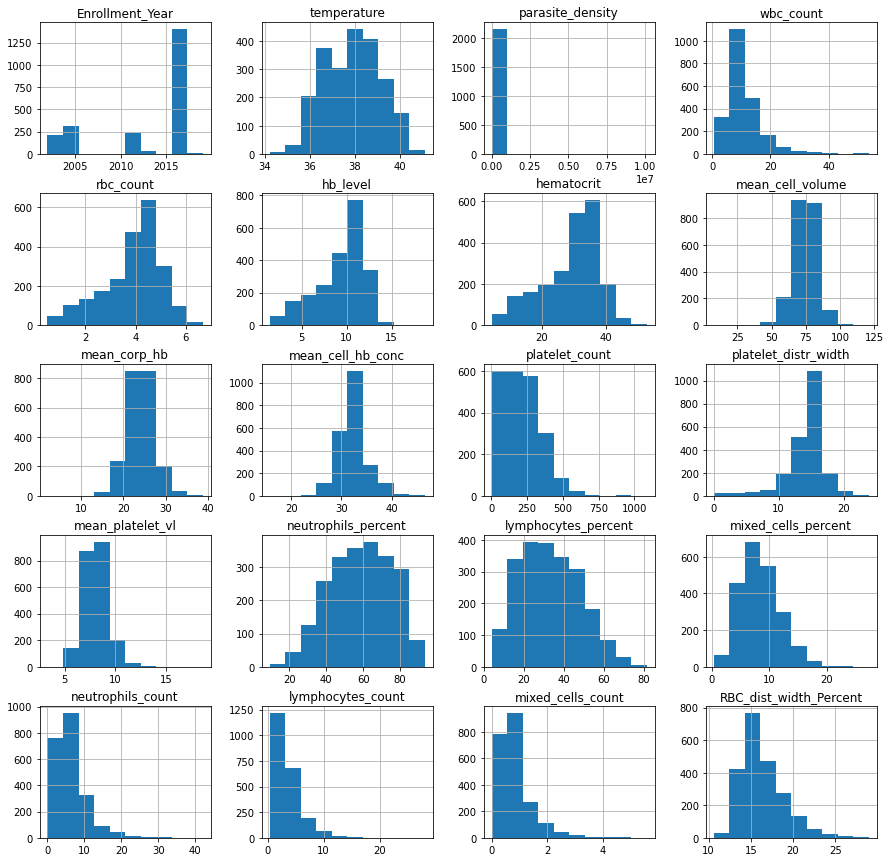

In [27]:
df.hist(bins=10,figsize=(15,15))
plt.show

4.2) Scatter Plot

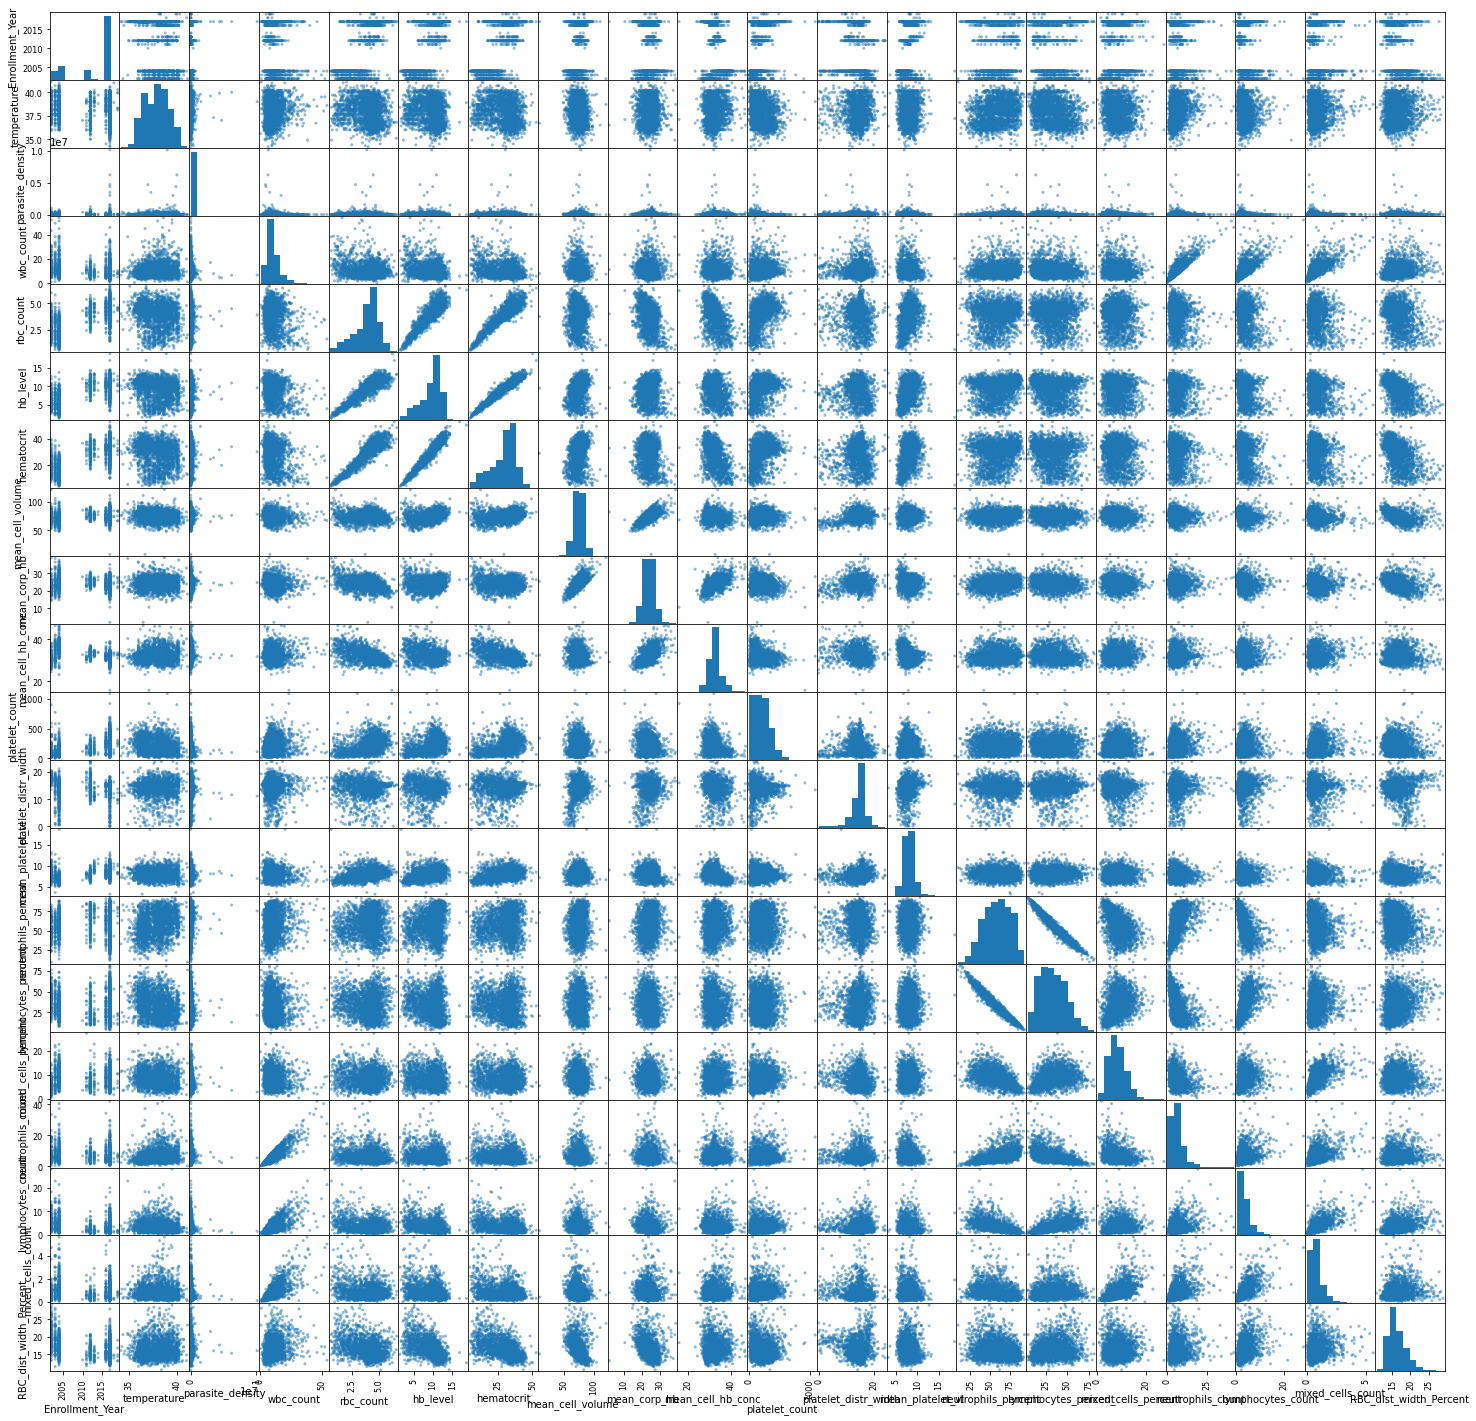

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (25,25));

4.4) Correlational Analysis with Heat Map

In [29]:
subset.corr()

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


<AxesSubplot:>

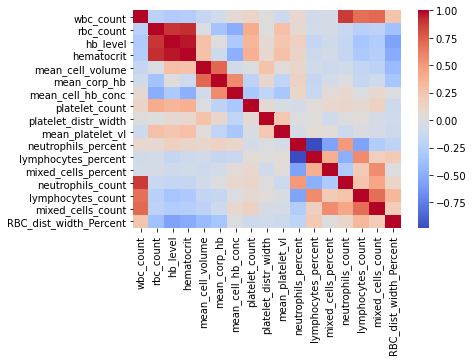

In [30]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(subset.corr(),cmap='coolwarm')

Observation

In [31]:
#From the correlation Heatmap, we can see that there is high correlation between Enrollment_Year,, 'wbc_count', 'rbc_count', 'hb_level','hematocrit', 'mean_cell_volume', 'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent' . We can use these features as an input from the use to predict the output

Step 5 Data Preprocessing

Step 5.1 Putting data in appropriate format

In [32]:
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [33]:
X.shape

(2156, 17)

In [34]:
y.shape

(2156,)

Step 5.2 Encode labels

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

Step 5.2 Spliting Dataset

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2)

In [37]:
X.head()

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [38]:
y.head()

0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [39]:
X_train.shape, y_train.shape

((1724, 17), (1724,))

In [40]:
X_test.shape, y_test.shape

((432, 17), (432,))

In [41]:
y_test.shape

(432,)

Step 5.2 Standardizing Dataset

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.fit_transform(X_test)

# Step 8 Building the Classification Algorithms and doing Predictions

Step 8.1 Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [44]:
X_train_scaled[0,0]

0.19475655430711614

In [45]:
lr_pred=lr.predict(X_test)

Step 8.2 KNeighbors Classifier (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
knn_pred=knn.predict(X_test)

Step 8.3 Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
nb_pred=nb.predict(X_test)

Step 8.4 Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [51]:
sv_pred=sv.predict(X_test)

Step 8.5 Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
dt_pred=dt.predict(X_test)

Step 8.6 Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [55]:
rf_pred=rf.predict(X_test)

Step 9 Model Evaluation

In [56]:
# Train Score and Test Score of Logistic Regression 
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression ", lr.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Regression ", lr.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Regression ", accuracy_score(y_test, lr_pred)*100)
print(metrics.classification_report(y_test, lr_pred))

Train Accuracy of Logistic Regression  81.2645011600928
Accuracy(Test) score of Logistic Regression  78.47222222222221
Accuracy(Test) score of Logistic Regression  78.47222222222221
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       167
           1       0.86      0.84      0.85       106
           2       0.77      0.69      0.73       159

    accuracy                           0.78       432
   macro avg       0.79      0.79      0.79       432
weighted avg       0.79      0.78      0.78       432



In [57]:
# Train Score and Test Score of KNN
print("Train Accuracy of Logistic KNN ",knn.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic KNN ", knn.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic KNN ", accuracy_score(y_test, knn_pred)*100)
print(metrics.classification_report(y_test, knn_pred))

Train Accuracy of Logistic KNN  82.77262180974478
Accuracy(Test) score of Logistic KNN  73.37962962962963
Accuracy(Test) score of Logistic KNN  73.37962962962963
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       167
           1       0.86      0.65      0.74       106
           2       0.72      0.65      0.68       159

    accuracy                           0.73       432
   macro avg       0.76      0.72      0.73       432
weighted avg       0.74      0.73      0.73       432



In [58]:
# Train Score and Test Score of Naive-Bayes
print("Train Accuracy of Logistic Naive-Bayes ",nb.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Naive-Bayes ", nb.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Naive-Bayes ", accuracy_score(y_test, nb_pred)*100)
print(metrics.classification_report(y_test, nb_pred))

Train Accuracy of Logistic Naive-Bayes  77.08816705336426
Accuracy(Test) score of Logistic Naive-Bayes  74.53703703703704
Accuracy(Test) score of Logistic Naive-Bayes  74.53703703703704
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       167
           1       0.79      0.80      0.79       106
           2       0.68      0.72      0.70       159

    accuracy                           0.75       432
   macro avg       0.75      0.75      0.75       432
weighted avg       0.75      0.75      0.75       432



In [59]:
# Train Score and Test Score of SVM
print("Train Accuracy of Logistic SVM ",sv.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic SVM ", sv.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic SVM ", accuracy_score(y_test, sv_pred)*100)
print(metrics.classification_report(y_test, sv_pred))

Train Accuracy of Logistic SVM  76.27610208816705
Accuracy(Test) score of Logistic SVM  71.75925925925925
Accuracy(Test) score of Logistic SVM  71.75925925925925
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       167
           1       0.75      0.68      0.71       106
           2       0.72      0.58      0.65       159

    accuracy                           0.72       432
   macro avg       0.72      0.71      0.71       432
weighted avg       0.72      0.72      0.71       432



In [60]:
# Train Score and Test Score of Decision Tree
print("Train Accuracy of Logistic Decision Tree ",dt.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Decision Tree ", dt.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Decision Tree ", accuracy_score(y_test, dt_pred)*100)
print(metrics.classification_report(y_test, dt_pred))

Train Accuracy of Logistic Decision Tree  99.94199535962876
Accuracy(Test) score of Logistic Decision Tree  75.46296296296296
Accuracy(Test) score of Logistic Decision Tree  75.46296296296296
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       167
           1       0.85      0.82      0.84       106
           2       0.70      0.69      0.69       159

    accuracy                           0.75       432
   macro avg       0.77      0.76      0.76       432
weighted avg       0.76      0.75      0.75       432



In [61]:
# Train Score and Test Score of Random Forest
print("Train Accuracy of Logistic Random Forest ",rf.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Random Forest ", rf.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Random Forest ", accuracy_score(y_test, rf_pred)*100)
print(metrics.classification_report(y_test, rf_pred))

Train Accuracy of Logistic Random Forest  99.94199535962876
Accuracy(Test) score of Logistic Random Forest  81.94444444444444
Accuracy(Test) score of Logistic Random Forest  81.94444444444444
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       167
           1       0.96      0.88      0.92       106
           2       0.80      0.75      0.77       159

    accuracy                           0.82       432
   macro avg       0.84      0.83      0.83       432
weighted avg       0.82      0.82      0.82       432

